### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)

### Bokeh Imports

In [2]:
from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, ColumnDataSource, PrintfTickFormatter
from bokeh.plotting import figure, output_notebook
from bokeh.transform import transform
from bokeh.palettes import Viridis3, Viridis256

# output plot to notebook
output_notebook()

Loading BokehJS ...

### Helpers

In [3]:
### Used to style Python print statements
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Load data

In [4]:
county = pd.read_csv("../../data/census/census_county.csv")
tract = pd.read_csv("../../data/census/census_tract.csv")

print("Shape of county:", county.shape, "  Shape of tract:", tract.shape)
print("Columns", county.columns)
county.head()

Shape of county: (3220, 37)   Shape of tract: (74001, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


# Missing values

### County data

Overview of missing values

In [5]:
missing_cols = [col for col in county.columns if any(county[col].isnull())]

print(county[missing_cols].isnull().sum())

### Look at rows with missing values
county[county.isnull().any(axis=1)]

Income          1
IncomeErr       1
ChildPoverty    1
dtype: int64


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao,85,42,43,4.7,37.6,0.0,0.0,21.2,35.3,80,66250.0,9909.0,46769,8448,15.2,NaN,31.3,23.4,21.9,4.7,18.8,34.3,7.5,0.0,40.3,14.9,3.0,9.2,64,25.0,64.1,10.9,0.0,0.0
2673,48301,Texas,Loving,117,74,43,35.0,41.0,0.0,12.8,0.0,0.0,98,NaN,NaN,25877,6544,28.9,0.0,22.6,22.6,32.3,4.8,17.7,64.5,11.3,0.0,8.1,0.0,16.1,25.4,62,71.0,27.4,1.6,0.0,15.1


### Tract data

Overview of missing values

In [6]:
missing_cols = [col for col in tract.columns if any(tract[col].isnull())]

print(tract[missing_cols].isnull().sum())

### Look at rows with missing values
tract[tract.isnull().any(axis=1)].head()

Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
43,1003990000,Alabama,Baldwin,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
107,1015981902,Alabama,Calhoun,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
108,1015981903,Alabama,Calhoun,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
597,1081040700,Alabama,Lee,4793,2053,2740,3.1,85.4,6.8,0.2,3.8,0.0,4690,22935.0,5974.0,4122.0,788.0,63.2,NaN,23.8,33.8,25.9,8.2,8.3,59.9,7.6,4.0,21.2,2.6,4.7,12.6,843,74.7,23.4,1.9,0.0,14.2


### Census data without a population is clearly ridiculous

In [7]:
before_N = len(tract)
tract = tract.drop(tract[tract.TotalPop == 0].index)
after_N = len(tract)
print("Number of rows removed:", before_N - after_N)

missing_cols = [col for col in tract.columns if any(tract[col].isnull())]
print(tract[missing_cols].isnull().sum())
### Look at rows with missing values
tract[tract.isnull().any(axis=1)].head()

Number of rows removed: 690
Income             410
IncomeErr          410
IncomePerCap        50
IncomePerCapErr     50
Poverty            145
ChildPoverty       428
Professional       117
Service            117
Office             117
Construction       117
Production         117
Drive              107
Carpool            107
Transit            107
Walk               107
OtherTransp        107
WorkAtHome         107
MeanCommute        259
PrivateWork        117
PublicWork         117
SelfEmployed       117
FamilyWork         117
Unemployment       112
dtype: int64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
597,1081040700,Alabama,Lee,4793,2053,2740,3.1,85.4,6.8,0.2,3.8,0.0,4690,22935.0,5974.0,4122.0,788.0,63.2,NaN,23.8,33.8,25.9,8.2,8.3,59.9,7.6,4.0,21.2,2.6,4.7,12.6,843,74.7,23.4,1.9,0.0,14.2
598,1081040800,Alabama,Lee,3310,1801,1509,1.6,76.6,9.5,1.2,10.9,0.0,2959,8160.0,3741.0,7068.0,1491.0,80.2,NaN,54.1,31.2,13.1,0.4,1.2,52.6,10.8,4.1,27.6,4.9,0.0,11.4,1141,57.4,40.7,1.9,0.0,11.8
805,1097003605,Alabama,Mobile,634,262,372,6.8,62.3,25.2,0.0,0.6,0.0,582,NaN,NaN,2791.0,1014.0,NaN,NaN,27.9,23.2,40.5,4.7,3.7,43.1,10.1,0.0,5.9,2.7,38.3,18.0,190,72.6,18.9,8.4,0.0,16.7
1298,2170000101,Alaska,Matanuska-Susitna Borough,744,384,360,1.9,89.9,2.0,3.6,0.7,0.5,561,NaN,NaN,22010.0,5220.0,31.0,37.1,29.3,18.1,16.3,25.6,10.7,25.6,6.0,0.0,18.6,10.7,39.1,22.6,215,51.6,13.0,35.3,0.0,26.1


### Most of the missing values appear to be in small tract sizes

I wonder how they structure tracts

In [8]:
tract.sort_values("TotalPop").head(20)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
55761,42003980600,Pennsylvania,Allegheny,3,0,3,0.0,100.0,0.0,0.0,0.0,0.0,3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
73348,72037160100,Puerto Rico,Ceiba,3,3,0,66.7,33.3,0.0,0.0,0.0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,50.0,NaN,1,100.0,0.0,0.0,0.0,0.0
58137,42101980900,Pennsylvania,Philadelphia,4,4,0,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
55760,42003980500,Pennsylvania,Allegheny,4,4,0,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
46492,36081021900,New York,Queens,4,0,4,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0
33953,26099982000,Michigan,Macomb,4,0,4,0.0,100.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0
27156,20209043804,Kansas,Wyandotte,4,4,0,100.0,0.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
59219,45041980100,South Carolina,Florence,4,0,4,0.0,100.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
45725,36061014300,New York,New York,5,0,5,40.0,0.0,40.0,0.0,0.0,0.0,4,NaN,NaN,2980.0,11980.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,100.0


# The nation as a whole

I include both Tract and County data for the dual purpose of validating that they are equal

In [9]:
pd.DataFrame({
    "Population": [tract.TotalPop.sum(), county.TotalPop.sum()],
    "Women": [tract.Women.sum(), county.Women.sum()],
    "Men": [tract.Men.sum(), county.Men.sum()],
    "Citizens": [tract.Citizen.sum(), county.Citizen.sum()],
    "States": [len(tract.State.unique()), len(county.State.unique())],
    "Counties": [len(tract.groupby(["State", "County"])), len(county.groupby(["State", "County"]))],
    "Employed": [tract.Employed.sum(), county.Employed.sum()],
}, index=["Tract data", "County data"]).transpose()

,Tract data,County data
Citizens,225190931,225190931
Counties,3220,3220
Employed,146811129,146811129
Men,157448140,157448140
Population,320098094,320098094
States,52,52
Women,162649954,162649954


### Population in State, County, Tracts

In [10]:
state_pop = county.groupby("State").TotalPop.sum()
print("The most populated State is:", color.BOLD, np.argmax(state_pop), color.END,
      "with a population of:", color.BOLD, max(state_pop), color.END)
print("The least populated State is:", color.BOLD, np.argmin(state_pop), color.END,
      "with a population of:", color.BOLD, min(state_pop), color.END)
print("The median number of people living in a State is:", color.BOLD, int(state_pop.median()), color.END)

print("\n*****************************\n")

county_pop = county.groupby(["State", "County"]).TotalPop.sum()
print("The most populated County is:", color.BOLD, np.argmax(county_pop), color.END,
      "with a population of:", color.BOLD, max(county_pop), color.END)
print("The least populated County is:", color.BOLD, np.argmin(county_pop), color.END,
      "with a population of:", color.BOLD, min(county_pop), color.END)
print("The median number of people living in a County is:", color.BOLD, int(county_pop.median()), color.END)

print("\n*****************************\n")

max_tract = tract.iloc[np.argmax(tract.TotalPop)][["CensusTract", "State", "County"]]
min_tract = tract.iloc[np.argmin(tract.TotalPop)][["CensusTract", "State", "County"]]

print("The most populated Tract is:\n\n", color.BOLD, max_tract, color.END,
      "\n\nwith a population of:", color.BOLD, max(tract.TotalPop), color.END)
print("\n-------------------\n")
print("The least populated Tract is:\n\n", color.BOLD, min_tract, color.END,
      "\n\nwith a population of:", color.BOLD, min(tract.TotalPop), color.END)
print("\n-------------------\n")
print("The median number of people sampled in a Tract is:", color.BOLD, int(tract.TotalPop.median()), color.END)

The most populated State is:  California  with a population of:  38421464 
The least populated State is:  Wyoming  with a population of:  579679 
The median number of people living in a State is:  4168293 

*****************************

The most populated County is:  ('California', 'Los Angeles')  with a population of:  10038388 
The least populated County is:  ('Hawaii', 'Kalawao')  with a population of:  85 
The median number of people living in a County is:  26035 

*****************************

The most populated Tract is:

  CensusTract    48201333600
State                Texas
County              Harris
Name: 64205, dtype: object  

with a population of:  53812 

-------------------

The least populated Tract is:

  CensusTract     42027012000
State          Pennsylvania
County               Centre
Name: 56253, dtype: object  

with a population of:  3 

-------------------

The median number of people sampled in a Tract is:  4085 


### Huge range of population in Tracts, let's see a distribution before moving on

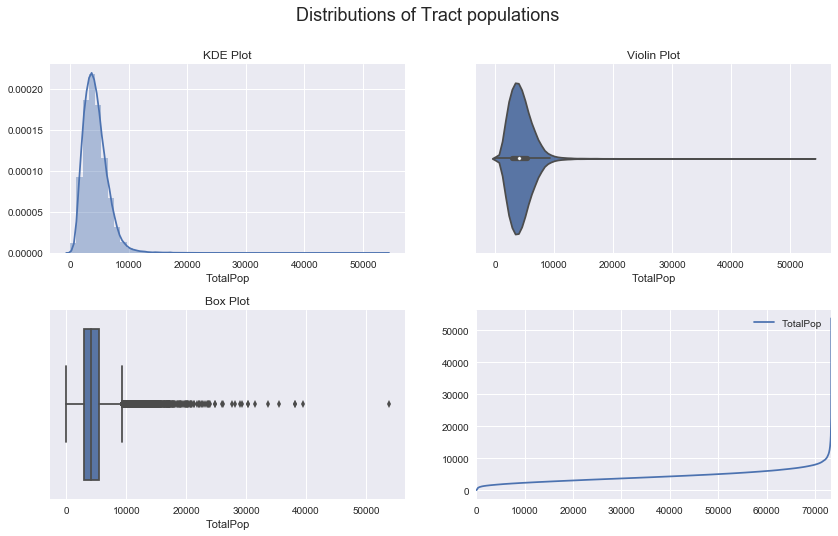

In [27]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of Tract populations", fontsize=18)

sns.distplot(tract.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(tract.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(tract.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
_ = tract.TotalPop.sort_values().reset_index().drop("index", axis=1).plot(kind="line", ax=axarr[1][1])

### County distributions

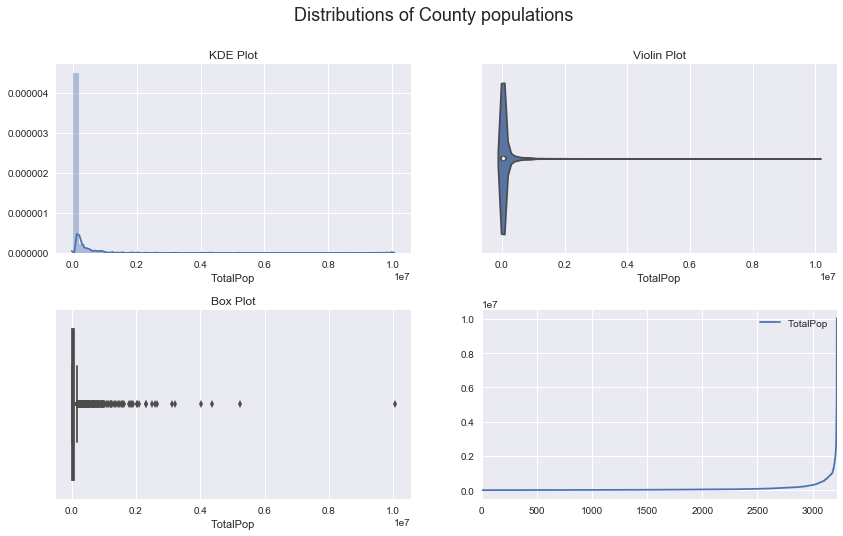

In [28]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of County populations", fontsize=18)

sns.distplot(county.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(county.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(county.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
_ = county.TotalPop.sort_values().reset_index().drop("index", axis=1).plot(kind="line", ax=axarr[1][1])

### State Distributions

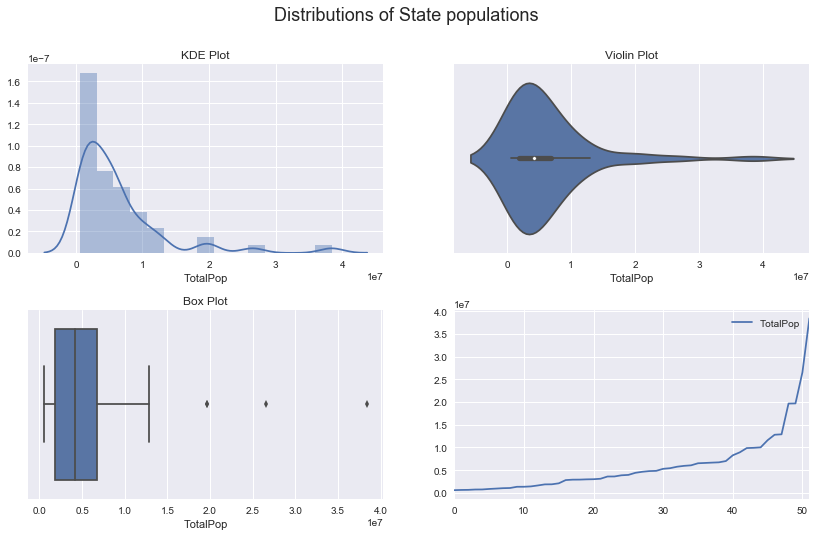

In [34]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of State populations", fontsize=18)

state_pop = county.groupby("State").TotalPop.sum()

sns.distplot(state_pop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(state_pop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(state_pop, ax=axarr[1][0]).set(title="Box Plot")
_ = state_pop.sort_values().reset_index().drop("State", axis=1).plot(kind="line", ax=axarr[1][1])

# Correlation Maps

Thank you to [Shashank Srivastava](https://stackoverflow.com/users/1688792/shashank-srivastava) for [his code](https://stackoverflow.com/questions/39191653/python-bokeh-how-to-make-a-correlation-plot)

In [12]:
def corr_map(df):
    df.index.name = 'AllColumns1'
    df.columns.name = 'AllColumns2'
    
    # Prepare data.frame in the right format
    df = df.stack().rename("value").reset_index()
    
    # You can use your own palette here
    colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']


    # I am using 'Viridis256' to map colors with value, change it with 'colors' if you need some specific colors
    mapper = LinearColorMapper(
        palette=Viridis256, low=df.value.min(), high=df.value.max())

    # Define a figure
    p = figure(
        plot_width=1100,
        plot_height=1000,
        x_range=list(df.AllColumns1.drop_duplicates()),
        y_range=list(df.AllColumns2.drop_duplicates()))

    # Create rectangle for heatmap
    p.rect(
        x="AllColumns1",
        y="AllColumns2",
        width=1,
        height=1,
        source=ColumnDataSource(df),
        line_color="Black",
        fill_color=transform('value', mapper))

    # Add legend
    color_bar = ColorBar(
        color_mapper=mapper,
        location=(0, 0),
        ticker=BasicTicker(desired_num_ticks=10))

    p.add_layout(color_bar, 'right')

    show(p)

### Since there are so many columns to look at, the correlation map will be split into 3

In [13]:
df_1 = census.drop("CensusTract", axis=1).corr().head(12)
corr_map(df_1)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='42fe81e0-ca46-4fe8-ba1a-dec361499cee', ...)


In [10]:
df_2 = census.drop("CensusTract", axis=1).corr().iloc[12:21]
corr_map(df_2)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='be720bb5-cfe7-4668-8bd1-70e4b8d508e0', ...)


In [11]:
df_3 = census.drop("CensusTract", axis=1).corr().tail(13)
corr_map(df_3)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='36547d56-4f01-4881-8f2b-e996a5e4346d', ...)
